In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittiroad
final_model_dir: ./experiments\fcn_alexnet_kittiroad\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 30
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 480, 3)
Size of masks collection :  (578, 320, 480)


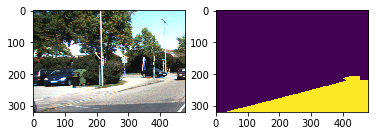

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
tf.reset_default_graph()

model = FcnAlexnetModel(config)
model.build()

Model built successfully.


In [4]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [5]:
with tf.Session() as sess : 
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    trainer.train()
    model.load(sess)
    print("Saving the final model..")
    builder.add_meta_graph_and_variables(sess,
                                       [tf.saved_model.tag_constants.TRAINING],
                                       signature_def_map=None,
                                       assets_collection=None)
builder.save()
print("Final model saved")

Variables initialized
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.11s/it]


-->Last epoch loss     :  1.5192842
-->Last epoch accuracy :  0.15661007
-->Last test loss      :  1.1889654
-->Last test accuracy  :  0.20177172
[BEST LOST : 1.1889654397964478]
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.12s/it]


-->Last epoch loss     :  0.81789666
-->Last epoch accuracy :  0.42490888
-->Last test loss      :  0.79078346
-->Last test accuracy  :  0.39318508
[BEST LOST : 0.7907834649085999]
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


-->Last epoch loss     :  0.71102625
-->Last epoch accuracy :  0.49068958
-->Last test loss      :  0.75488675
-->Last test accuracy  :  0.49024156
[BEST LOST : 0.7548867464065552]
Saving model...
Model saved
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.12s/it]


-->Last epoch loss     :  0.5659048
-->Last epoch accuracy :  0.60393065
-->Last test loss      :  0.5507952
-->Last test accuracy  :  0.647921
[BEST LOST : 0.5507951974868774]
Saving model...
Model saved
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


-->Last epoch loss     :  0.41686743
-->Last epoch accuracy :  0.7071901
-->Last test loss      :  0.467506
-->Last test accuracy  :  0.6570352
[BEST LOST : 0.4675059914588928]
Saving model...
Model saved
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


-->Last epoch loss     :  0.45851725
-->Last epoch accuracy :  0.6835077
-->Last test loss      :  0.4275537
-->Last test accuracy  :  0.7020647
[BEST LOST : 0.4275537133216858]
Saving model...
Model saved
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.14s/it]


-->Last epoch loss     :  0.33588517
-->Last epoch accuracy :  0.7727764
-->Last test loss      :  0.3716733
-->Last test accuracy  :  0.74824464
[BEST LOST : 0.3716732859611511]
Saving model...
Model saved
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.15s/it]


-->Last epoch loss     :  0.37525466
-->Last epoch accuracy :  0.7410308
-->Last test loss      :  0.370547
-->Last test accuracy  :  0.754971
[BEST LOST : 0.37054699659347534]
Saving model...
Model saved
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


-->Last epoch loss     :  0.42884526
-->Last epoch accuracy :  0.6997384
-->Last test loss      :  0.42604133
-->Last test accuracy  :  0.73317236
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.12s/it]


-->Last epoch loss     :  0.3426981
-->Last epoch accuracy :  0.75886774
-->Last test loss      :  0.34999457
-->Last test accuracy  :  0.7753717
[BEST LOST : 0.34999457001686096]
Saving model...
Model saved
Epoch  10


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.16s/it]


-->Last epoch loss     :  0.2904793
-->Last epoch accuracy :  0.7935356
-->Last test loss      :  0.33489364
-->Last test accuracy  :  0.77646154
[BEST LOST : 0.3348936438560486]
Saving model...
Model saved
Epoch  11


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


-->Last epoch loss     :  0.3908702
-->Last epoch accuracy :  0.72909087
-->Last test loss      :  0.42232418
-->Last test accuracy  :  0.72238046
Epoch  12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.13s/it]


-->Last epoch loss     :  0.3635381
-->Last epoch accuracy :  0.74947494
-->Last test loss      :  0.32754526
-->Last test accuracy  :  0.78125954
[BEST LOST : 0.32754525542259216]
Saving model...
Model saved
Epoch  13


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.13s/it]


-->Last epoch loss     :  0.37613204
-->Last epoch accuracy :  0.739276
-->Last test loss      :  0.29456922
-->Last test accuracy  :  0.8028948
[BEST LOST : 0.2945692241191864]
Saving model...
Model saved
Epoch  14


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.12s/it]


-->Last epoch loss     :  0.33315566
-->Last epoch accuracy :  0.7577444
-->Last test loss      :  0.34596667
-->Last test accuracy  :  0.77085346
Epoch  15


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.13s/it]


-->Last epoch loss     :  0.29291573
-->Last epoch accuracy :  0.7930783
-->Last test loss      :  0.28576013
-->Last test accuracy  :  0.8063865
[BEST LOST : 0.28576013445854187]
Saving model...
Model saved
Epoch  16


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.12s/it]


-->Last epoch loss     :  0.2740346
-->Last epoch accuracy :  0.7963465
-->Last test loss      :  0.27953467
-->Last test accuracy  :  0.80915624
[BEST LOST : 0.2795346677303314]
Saving model...
Model saved
Epoch  17


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.13s/it]


-->Last epoch loss     :  0.23565607
-->Last epoch accuracy :  0.83463967
-->Last test loss      :  0.268575
-->Last test accuracy  :  0.8245814
[BEST LOST : 0.2685750126838684]
Saving model...
Model saved
Epoch  18


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


-->Last epoch loss     :  0.26429328
-->Last epoch accuracy :  0.81294984
-->Last test loss      :  0.29919875
-->Last test accuracy  :  0.8070584
Epoch  19


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:34<00:00,  2.13s/it]


-->Last epoch loss     :  0.21671599
-->Last epoch accuracy :  0.8440926
-->Last test loss      :  0.31352088
-->Last test accuracy  :  0.80529404
Epoch  20


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:35<00:00,  2.16s/it]


-->Last epoch loss     :  0.24792929
-->Last epoch accuracy :  0.82202256
-->Last test loss      :  0.2650628
-->Last test accuracy  :  0.84131813
[BEST LOST : 0.2650628089904785]
Saving model...
Model saved
Epoch  21


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:35<00:00,  2.15s/it]


-->Last epoch loss     :  0.18395749
-->Last epoch accuracy :  0.86887825
-->Last test loss      :  0.24509548
-->Last test accuracy  :  0.84023374
[BEST LOST : 0.24509547650814056]
Saving model...
Model saved
Epoch  22


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:35<00:00,  2.14s/it]


-->Last epoch loss     :  0.14661762
-->Last epoch accuracy :  0.8988266
-->Last test loss      :  0.26326472
-->Last test accuracy  :  0.8449402
Epoch  23


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:37<00:00,  2.19s/it]


-->Last epoch loss     :  0.18565291
-->Last epoch accuracy :  0.8714768
-->Last test loss      :  0.24653858
-->Last test accuracy  :  0.84187686
Epoch  24


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:34<00:00,  2.14s/it]


-->Last epoch loss     :  0.1529984
-->Last epoch accuracy :  0.8929557
-->Last test loss      :  0.24740325
-->Last test accuracy  :  0.8501358
Epoch  25


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:34<00:00,  2.14s/it]


-->Last epoch loss     :  0.16450317
-->Last epoch accuracy :  0.880076
-->Last test loss      :  0.26221678
-->Last test accuracy  :  0.84284323
Epoch  26


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:34<00:00,  2.15s/it]


-->Last epoch loss     :  0.123221494
-->Last epoch accuracy :  0.91321445
-->Last test loss      :  0.25273234
-->Last test accuracy  :  0.85520124
Epoch  27


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:34<00:00,  2.14s/it]


-->Last epoch loss     :  0.109556004
-->Last epoch accuracy :  0.92450213
-->Last test loss      :  0.24840218
-->Last test accuracy  :  0.85686857
Early Stopping !
Loading model checkpoint ./experiments\fcn_alexnet_kittiroad\checkpoint/-2200 ...
INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\checkpoint/-2200
Model loaded
Saving the final model..
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./experiments\fcn_alexnet_kittiroad\saved_model/saved_model.pb
Final model saved


Loading final model 
INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\saved_model/variables\variables
Final model loaded


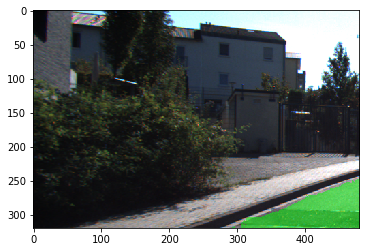

Accuracy :  0.9186966


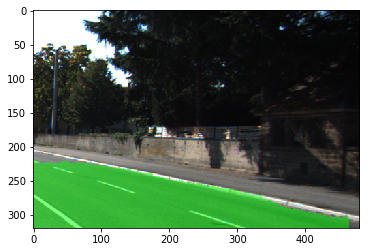

Accuracy :  0.9513002


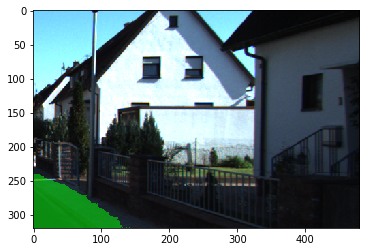

Accuracy :  0.46271625


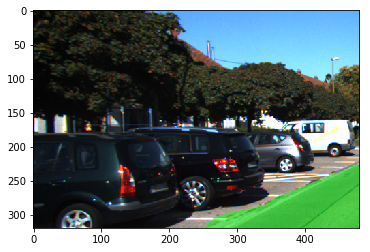

Accuracy :  0.8937489


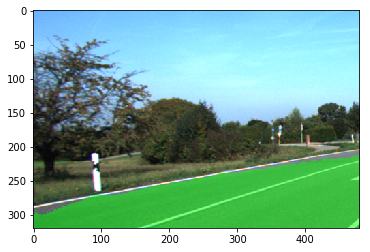

Accuracy :  0.95745164


In [6]:
with tf.Session() as sess:   
    print("Loading final model ")
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)
    print("Final model loaded")
    test = [data.get_data_element("test_data",i) for i in range(5)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)

Variables initialized
Loading model checkpoint ./experiments\fcn_alexnet_kittiroad\checkpoint/-2200 ...
INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\checkpoint/-2200
Model loaded


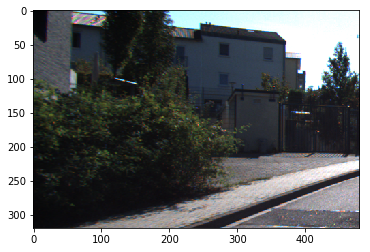

Accuracy :  0.09801285


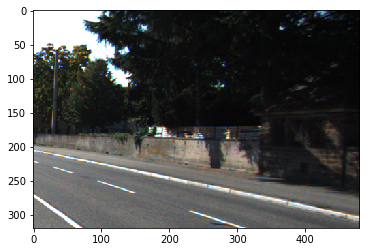

Accuracy :  0.27692917


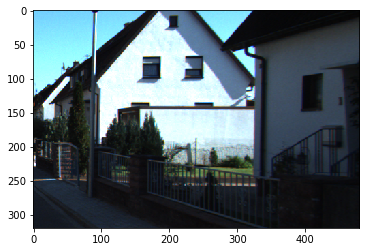

Accuracy :  0.02529376


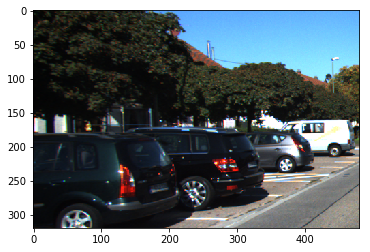

Accuracy :  0.107891895


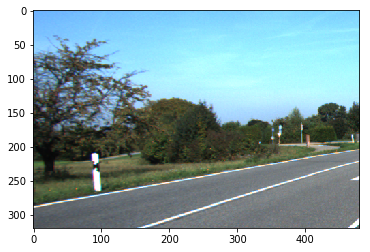

Accuracy :  0.321025


In [7]:
with tf.Session() as sess : 
    test = [data.get_data_element("test_data",i) for i in range(5)]
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    model.load(sess)
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)